In [ ]:
import pandas as pd
import numpy as np

train_file = pd.read_csv('train.csv')
test_file = pd.read_csv('test.csv')
train_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
passengerids = test_file['PassengerId']

In [ ]:
print(passengerids)

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


In [ ]:
for file_ in (train_file,test_file):
  file_.drop(['PassengerId', 'Cabin','Name','Ticket'],axis=1, inplace=True)

In [ ]:
train_file = train_file[['Sex','Age','SibSp','Parch','Pclass','Fare','Embarked','Survived']]

In [ ]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
train_file.head()

,Sex,Age,SibSp,Parch,Pclass,Fare,Embarked,Survived
0,male,22.0,1,0,3,7.2500,S,0
1,female,38.0,1,0,1,71.2833,C,1
2,female,26.0,0,0,3,7.9250,S,1
3,female,35.0,1,0,1,53.1000,S,1
4,male,35.0,0,0,3,8.0500,S,0


In [ ]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Pclass    891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

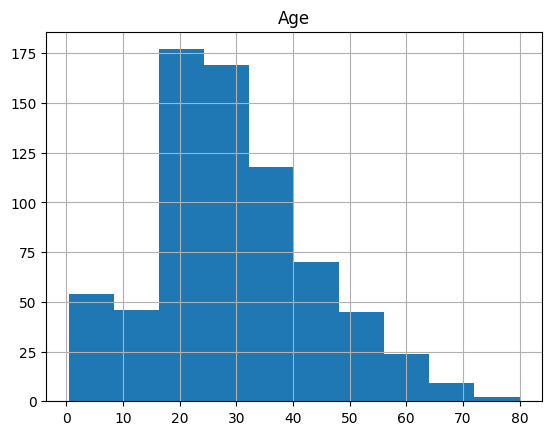

In [ ]:
train_file.hist('Age')

In [ ]:
train_file['Age'].fillna(train_file['Age'].median(), inplace=True)
test_file['Age'].fillna(test_file['Age'].median(),inplace=True)

In [ ]:
test_file['Fare'].fillna(test_file['Fare'].median(),inplace=True)

<Axes: >

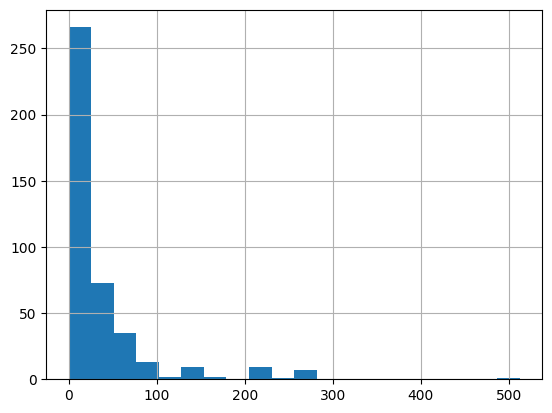

In [ ]:
test_file['Fare'].hist(bins=20)

In [ ]:
train_file['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train_file['Embarked'].fillna('S',inplace=True)

In [ ]:
corr_matrix = train_file.corr()
corr_matrix['Survived'].sort_values(ascending=False)

<ipython-input-16-d25112cc18b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_file.corr()


Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Pclass     -0.338481
Name: Survived, dtype: float64

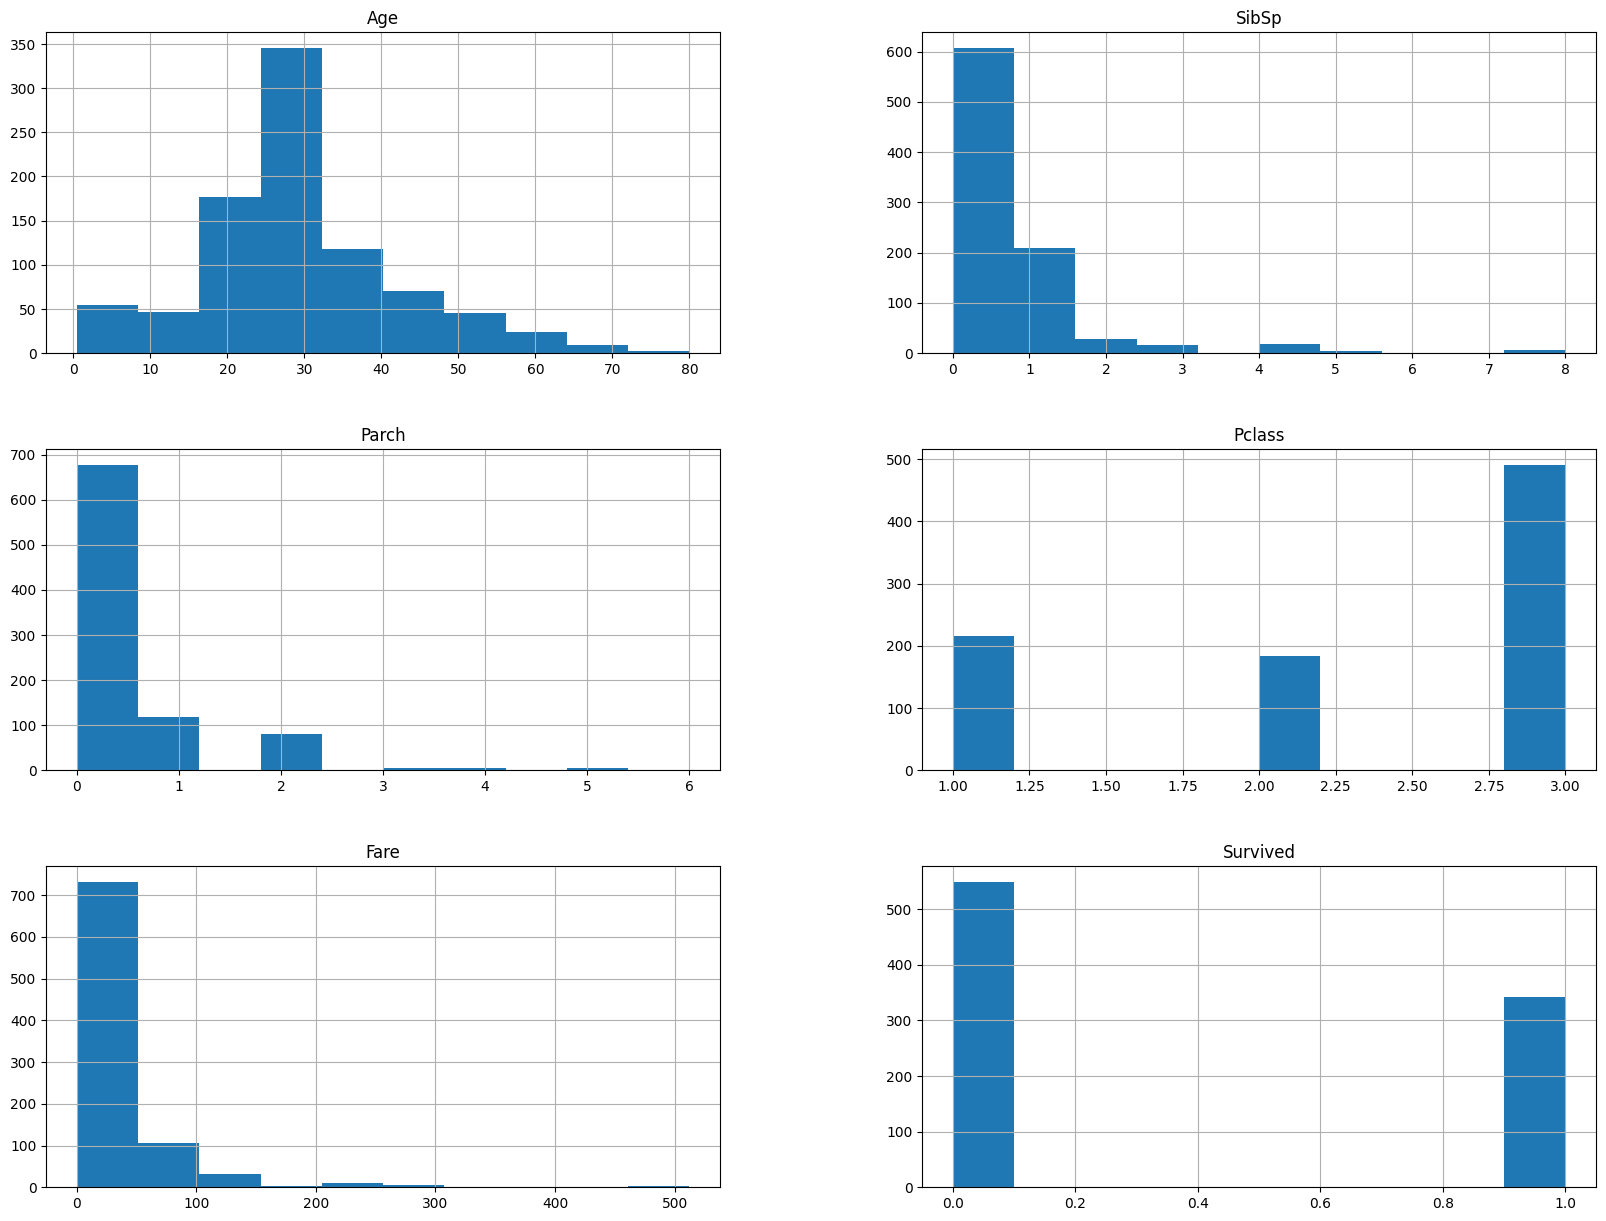

In [ ]:
import matplotlib.pyplot as plt
train_file.hist(bins=10,figsize=(20,15))
plt.show()

<Axes: xlabel='Pclass', ylabel='Count'>

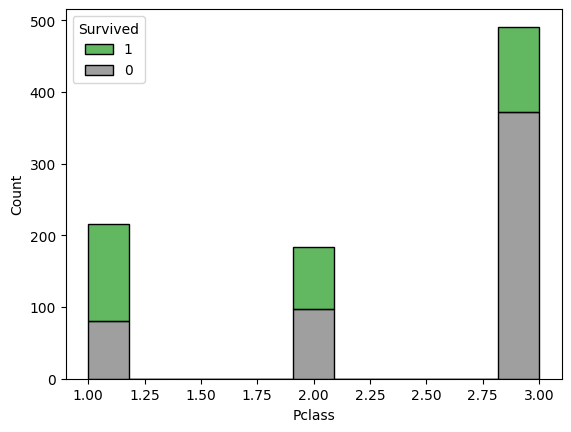

In [ ]:
import seaborn as sns
sns.histplot(data=train_file,x='Pclass',hue='Survived',multiple='stack',palette={0:'tab:gray',1:'tab:green'},hue_order=[1,0])

In [ ]:
passengers = train_file.drop('Survived',axis=1)
passengers_labels = train_file['Survived'].copy()

In [ ]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Pclass    891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [ ]:
passengers.Sex[passengers.Sex == 'male'] = 1
passengers.Sex[passengers.Sex == 'female'] = 0

<ipython-input-21-ca9574e6f26c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passengers.Sex[passengers.Sex == 'male'] = 1
<ipython-input-21-ca9574e6f26c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passengers.Sex[passengers.Sex == 'female'] = 0


In [ ]:
passengers.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), ['Age','Fare']),
    ('cat', OneHotEncoder(), ['Embarked'])
],remainder='passthrough')

passengers_prepared = full_pipeline.fit_transform(passengers)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(passengers_prepared, passengers_labels)
l_passengers_predictions = log_reg.predict(passengers_prepared)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier()
tree_reg.fit(passengers_prepared, passengers_labels)
t_passengers_predictions = tree_reg.predict(passengers_prepared)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier()
forest_reg.fit(passengers_prepared, passengers_labels)
f_passengers_predictions = forest_reg.predict(passengers_prepared)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
for prediction in (l_passengers_predictions, t_passengers_predictions, f_passengers_predictions):
  print(confusion_matrix(passengers_labels, prediction),end='\n\n\n')

[[473  76]
 [102 240]]


[[547   2]
 [ 16 326]]


[[541   8]
 [ 10 332]]




In [ ]:
#Decision Tree's and Random Forest's AUC Scores are suspicious, there may be a problem of overfitting, cross-validation is needed
from sklearn.metrics import roc_auc_score
print("Logistic Regression AUC Score                : {}".format(roc_auc_score(passengers_labels, l_passengers_predictions)))
print("Decision Tree AUC Score                : {}".format(roc_auc_score(passengers_labels, t_passengers_predictions)))
print("Random Forest AUC Score                : {}".format(roc_auc_score(passengers_labels, f_passengers_predictions)))


Logistic Regression AUC Score                : 0.7816604352411083
Decision Tree AUC Score                : 0.9747866935097307
Random Forest AUC Score                : 0.9780941424599752


In [ ]:
from sklearn.model_selection import cross_val_score
for reg in (log_reg, tree_reg, forest_reg):
  scores = cross_val_score(reg, passengers_prepared, passengers_labels, scoring='roc_auc',cv=10)
  print('Scores:',scores)
  print('Mean:',scores.mean())
  print('Standard Deviation:', scores.std())
  print()

Scores: [0.85142857 0.84010695 0.79705882 0.87994652 0.85454545 0.84812834
 0.85989305 0.83582888 0.88395722 0.86984127]
Mean: 0.8520735081911551
Standard Deviation: 0.02371941702739331

Scores: [0.72961039 0.76791444 0.67780749 0.76684492 0.86203209 0.79679144
 0.77299465 0.75294118 0.85320856 0.82777778]
Mean: 0.7807922926746456
Standard Deviation: 0.05360031855872048

Scores: [0.80311688 0.86229947 0.72352941 0.88903743 0.92887701 0.87459893
 0.85481283 0.83315508 0.91390374 0.88148148]
Mean: 0.8564812268341679
Standard Deviation: 0.05626397381304047



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='roc_auc', return_train_score=True)
grid_search.fit(passengers_prepared,passengers_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='roc_auc')

In [ ]:
new_param_grid = [{'n_estimators':[30,35,40], 'max_features':[8,10,12]}]
new_grid_search = GridSearchCV(forest_reg, new_param_grid, cv=5, scoring='roc_auc', return_train_score=True)
new_grid_search.fit(passengers_prepared,passengers_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [8, 10, 12],
                          'n_estimators': [30, 35, 40]}],
             return_train_score=True, scoring='roc_auc')

In [ ]:
new_grid_search.best_params_

{'max_features': 12, 'n_estimators': 30}

In [ ]:
new_grid_search.best_score_

0.8613144034493081

In [ ]:
final_model = new_grid_search.best_estimator_
test_file.Sex[test_file.Sex == 'male'] = 1
test_file.Sex[test_file.Sex == 'female'] = 0
X_test_prepared = full_pipeline.transform(test_file)



<ipython-input-34-cee791625b12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_file.Sex[test_file.Sex == 'male'] = 1
<ipython-input-34-cee791625b12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_file.Sex[test_file.Sex == 'female'] = 0


In [ ]:
final_predictions = final_model.predict(X_test_prepared)

In [ ]:
print(final_predictions)

[0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 1 1 1 1 0 0 1 0 0 0]


In [ ]:
ans_dict = {'PassengerId':passengerids, 'Survived':final_predictions}
ans_df = pd.DataFrame.from_dict(ans_dict)


In [ ]:
log_param_grid = {"C":[1,2,3,4]}
log_grid_search = GridSearchCV(log_reg, log_param_grid, cv=5, scoring='roc_auc', return_train_score=True)

log_grid_search.fit(passengers_prepared,passengers_labels)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4]}, return_train_score=True,
             scoring='roc_auc')

In [ ]:
log_grid_search.best_params_

{'C': 1}

In [ ]:

ans_df.to_csv(r'C:\Users\Asus Vivobook\Desktop\Titanic_Kaggle.csv', index=False, encoding='utf-8')

In [ ]:
from pandas.core.ops.array_ops import logical_op
log_final_model = log_grid_search.best_estimator_
log_final_predictions = log_final_model.predict(X_test_prepared)
log_ans_dict = {'PassengerId':passengerids, 'Survived':log_final_predictions}
log_ans_df = pd.DataFrame.from_dict(ans_dict)

In [ ]:

log_ans_df.to_csv(r'Titanic_Kaggle2.csv', index=False, encoding='utf-8')